In [ ]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
(x_train_ori,y_train),(x_test_ori,y_test)=tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
# Define the desired dimensions for the padded images
desired_height = 30
desired_width = 30

# Calculate the amount of padding for each side
vertical_pad = (desired_height - 28) // 2
horizontal_pad = (desired_width - 28) // 2

# Create empty arrays to hold the padded images
padded_x_train_ori = np.zeros((x_train_ori.shape[0], desired_height, desired_width), dtype=np.float32)
padded_x_test_ori = np.zeros((x_test_ori.shape[0], desired_height, desired_width), dtype=np.float32)

# Iterate through the original images and apply padding
for i in range(x_train_ori.shape[0]):
    padded_x_train_ori[i, vertical_pad:vertical_pad+28, horizontal_pad:horizontal_pad+28] = x_train_ori[i]

for i in range(x_test_ori.shape[0]):
    padded_x_test_ori[i, vertical_pad:vertical_pad+28, horizontal_pad:horizontal_pad+28] = x_test_ori[i]

In [ ]:
x_train=padded_x_train_ori/255
x_test=padded_x_test_ori/255


x_train=x_train.reshape((60000,30,30,1))
x_test=x_test.reshape((10000,30,30,1))

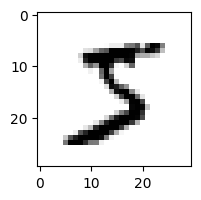

In [ ]:
import matplotlib.pyplot as plt
def plot_image(img):
  fig=plt.gcf()
  fig.set_size_inches(2,2)
  plt.imshow(img, cmap='binary')
  plt.show()

plot_image(x_train[0])

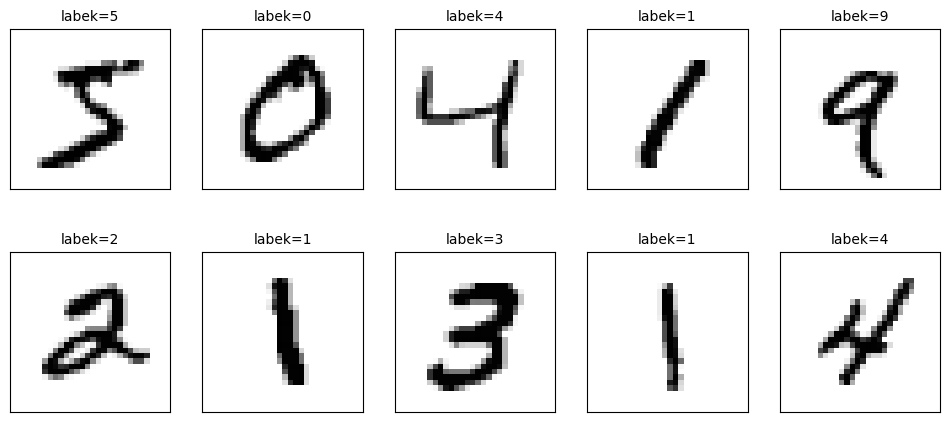

In [ ]:
def plot_multi_image(img, label, predict, idx, num=10):
  fig=plt.gcf()
  fig.set_size_inches(12,14)
  for i in range(0, num):
    ax=plt.subplot(5,5,1+i)
    ax.imshow(img[idx],cmap='binary')
    title="labek=" +str(label[idx])
    if len(predict) > 0:
      title+=", predict=" +str(predict[idx])
    ax.set_title(title,fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])
    idx+=1
  plt.show()

plot_multi_image(x_train,y_train,[],0,10)


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
CNN=keras.Sequential(name='CNN')
CNN.add(layers.Conv2D(8, (3,3) , activation='relu' , input_shape=(30,30,1) ))
CNN.add(layers.MaxPool2D(2,2))

CNN.add(layers.Conv2D(16, (3,3) , activation='relu'))
CNN.add(layers.MaxPool2D(2,2))

CNN.add(layers.Flatten())   #1296
CNN.add(layers.Dense(128, activation='relu'))
CNN.add(layers.Dense(10, activation='softmax'))


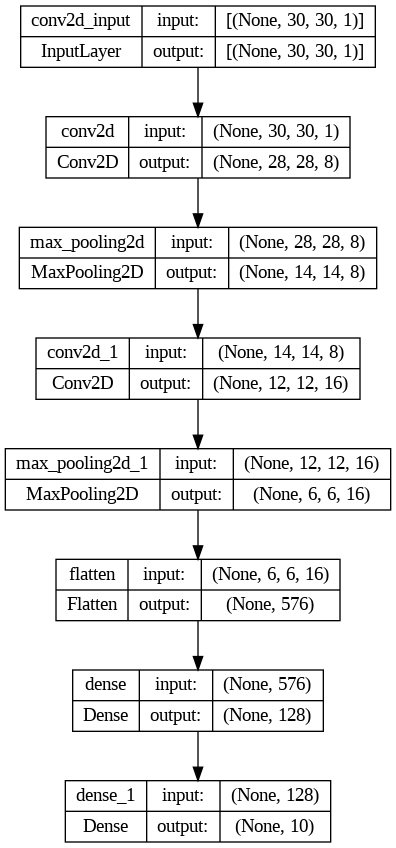

In [ ]:
keras.utils.plot_model(CNN,show_shapes=True)


In [ ]:
print(CNN.summary())

Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 576)               0         
                                                                 
 dense (Dense)               (None, 128)               73856   

In [ ]:
CNN.compile(optimizer='Adam',
      loss=keras.losses.sparse_categorical_crossentropy,
      metrics=['accuracy'])

In [ ]:
history = CNN.fit(x_train, y_train, validation_split=0.2, epochs=5, batch_size=300, verbose=2)

Epoch 1/5
160/160 - 15s - loss: 0.5894 - accuracy: 0.8491 - val_loss: 0.1615 - val_accuracy: 0.9564 - 15s/epoch - 96ms/step
Epoch 2/5
160/160 - 1s - loss: 0.1371 - accuracy: 0.9581 - val_loss: 0.1052 - val_accuracy: 0.9698 - 665ms/epoch - 4ms/step
Epoch 3/5
160/160 - 1s - loss: 0.0916 - accuracy: 0.9723 - val_loss: 0.0791 - val_accuracy: 0.9773 - 653ms/epoch - 4ms/step
Epoch 4/5
160/160 - 1s - loss: 0.0726 - accuracy: 0.9778 - val_loss: 0.0662 - val_accuracy: 0.9815 - 677ms/epoch - 4ms/step
Epoch 5/5
160/160 - 1s - loss: 0.0615 - accuracy: 0.9810 - val_loss: 0.0654 - val_accuracy: 0.9818 - 688ms/epoch - 4ms/step


In [ ]:
def show_train_history(history,train,validation):
    plt.plot(history.history[train])
    plt.plot(history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

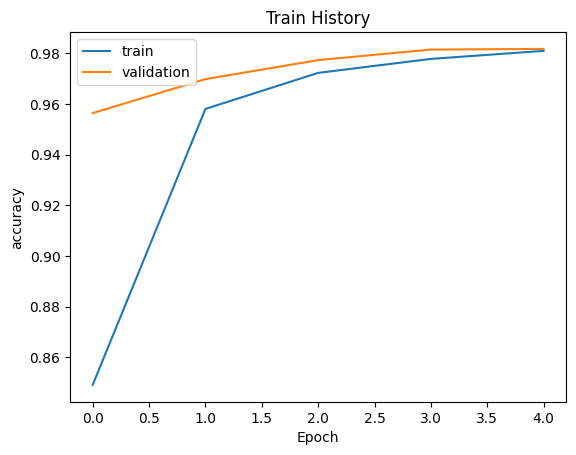

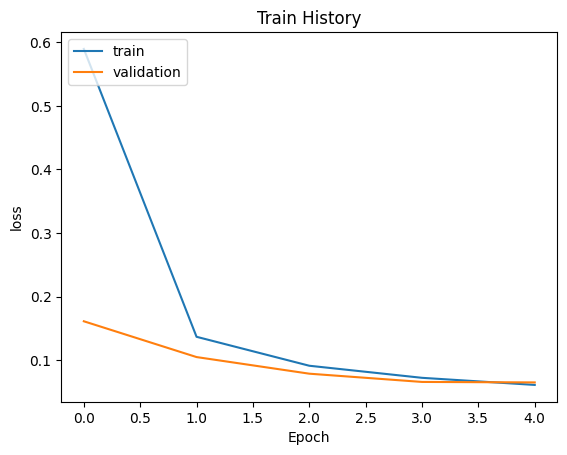

In [ ]:
show_train_history(history, 'accuracy', 'val_accuracy')
show_train_history(history, 'loss', 'val_loss')

In [ ]:
scores = CNN.evaluate(x_test,y_test)
print(scores[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.0560 - accuracy: 0.9817
0.9817000031471252


In [ ]:
#predict
prediction = np.argmax(CNN.predict(x_test), axis=-1)
print(prediction)

313/313 [==============================] - 1s 3ms/step
[7 2 1 ... 4 5 6]


In [ ]:
#probability
predict_probability = CNN.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
def show_predict_probability(img,label,predict,probability,idx):
  print('label:',label[idx],'predict:',prediction[idx])
  plt.figure(figsize=[2,2])
  plt.imshow(np.reshape(img[idx],(28,28,1)))
  plt.show()
  for i in range (10):
    print(str(i) + 'probability:%1.8f'%(predict_probability[idx][i]))

label: 7 predict: 7


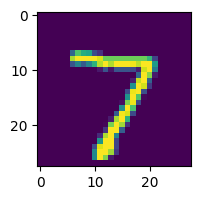

0probability:0.00000012
1probability:0.00000005
2probability:0.00004185
3probability:0.00013479
4probability:0.00000000
5probability:0.00000007
6probability:0.00000000
7probability:0.99981803
8probability:0.00000098
9probability:0.00000417


In [ ]:
show_predict_probability(x_test_ori,y_test,prediction,predict_probability,0)

In [ ]:
CNN.save('/content/drive/My Drive/py/CNN_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#save weights to .coe
# weight_values = []
# for layer in CNN.layers:
#     weights = layer.get_weights()
#     if len(weights) > 0:
#         weight_values.append(weights[0])  # Add only the weight tensor



In [ ]:
# def float_to_fixed_point(value, fractional_bits=8):
#     scale_factor = 2 ** fractional_bits
#     return int(value * scale_factor)

# coe_data = []
# for weight_array in weight_values:
#     for value in weight_array.flatten():
#         fixed_point_value = float_to_fixed_point(value)
#         # Convert to 16-bit signed two's complement hexadecimal
#         hex_value = format(fixed_point_value & 0xFFFF, '04x')  # Mask to 16 bits (2 bytes)
#         coe_data.append(hex_value)

In [ ]:
# with open('/content/drive/My Drive/py/weights.coe', 'w') as coe_file:
#     coe_file.write('memory_initialization_radix=10;\n')
#     coe_file.write('memory_initialization_vector=\n')
#     coe_file.write(',\n'.join(map(str, coe_data)))
#     coe_file.write(';')

In [ ]:
# #save bias to .coe
# bias_values = []
# for layer in CNN.layers:
#     if hasattr(layer, 'bias'):
#         bias_values.append(layer.bias.numpy())

In [ ]:
# def float_to_fixed_point(value, fractional_bits=8):
#     scale_factor = 2 ** fractional_bits
#     return int(value * scale_factor)

# coe_data = []
# for bias_array in bias_values:
#     for value in bias_array:
#         fixed_point_value = float_to_fixed_point(value)
#         # Convert to 16-bit signed two's complement hexadecimal
#         hex_value = format(fixed_point_value & 0xFFFF, '04x')  # Mask to 16 bits (2 bytes)
#         coe_data.append(hex_value)

In [ ]:
# with open('/content/drive/My Drive/py/bias.coe', 'w') as coe_file:
#     coe_file.write('memory_initialization_radix=10;\n')
#     coe_file.write('memory_initialization_vector=\n')
#     coe_file.write(',\n'.join(map(str, coe_data)))
#     coe_file.write(';')